In [130]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

In [46]:
data = pd.read_csv("train.csv")

## Bio-data

- p_id: Patient's ID
- no_times_pregnant: Number of times pregnant
- glucose_concentration: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- blood_pressure: Diastolic blood pressure (mm Hg)
- skin_fold_thickness: Triceps skin fold thickness (mm)
- serum_insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- diabetes pedigree: Diabetes pedigree function
- Age: Age (years)
- diabetes: Outcome Class variable (0 or 1)

In [47]:
data.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_times_pregnant      768 non-null    int64  
 1   glucose_concentration  768 non-null    int64  
 2   blood_pressure         768 non-null    int64  
 3   skin_fold_thickness    768 non-null    int64  
 4   serum_insulin          768 non-null    int64  
 5   bmi                    768 non-null    float64
 6   diabetes pedigree      768 non-null    float64
 7   age                    768 non-null    int64  
 8   diabetes               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


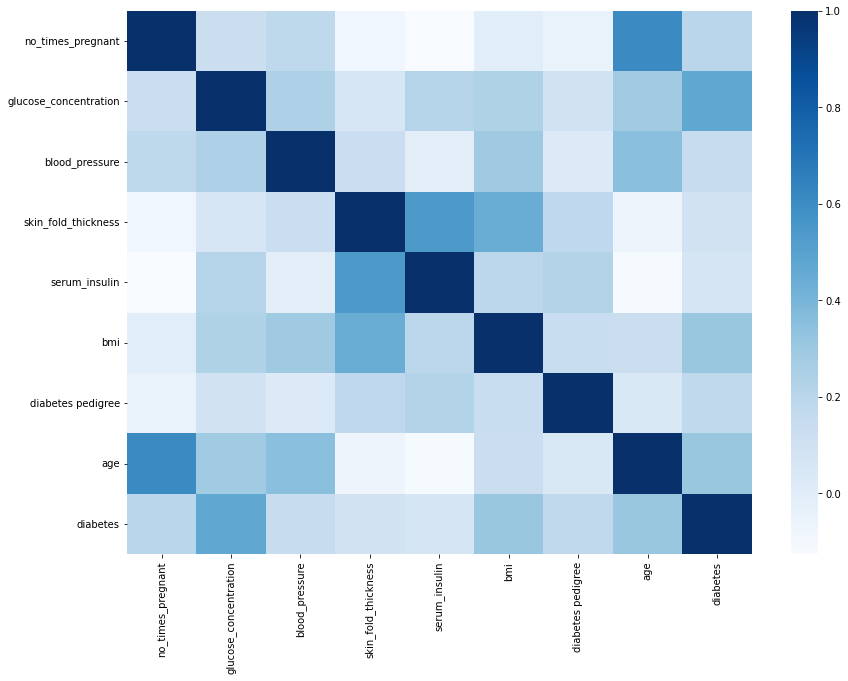

In [49]:
data.drop_duplicates(inplace=True)

plt.figure(figsize=(14,10))
sns.heatmap(data.corr("spearman"), cmap="Blues")
plt.show()

Pregnancy lower bound score is: 1.0
Pregnancy upper bound score is: 10.0


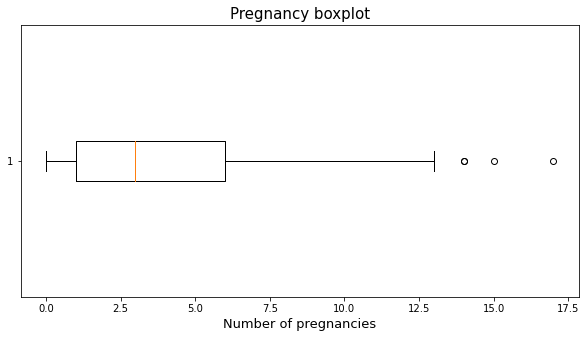

In [50]:
# Finding out lower and upper class bound for pacient pregnancy.
pregnancy_lower_bound = data.no_times_pregnant.quantile(0.25)
pregnancy_upper_bound = data.no_times_pregnant.quantile(0.94)
print(f"Pregnancy lower bound score is: {pregnancy_lower_bound}\nPregnancy upper bound score is: {pregnancy_upper_bound}")

plt.figure(figsize= (10,5))
plt.boxplot(data.no_times_pregnant, vert=False)
plt.title("Pregnancy boxplot", fontsize= 15)
plt.xlabel("Number of pregnancies", fontsize= 13)
plt.show()

## Things to note about number of pregnancies:
- It is possible to have given birth to ni child.
- The lower class bound of the dataset is **1** and the upper bound is **10** which is already a huge amount realistically speaking in todays world therefore, any data with number of pregnancies above 10 will be taken as an outlier and dropped.

In [51]:
# Removal of outliers
pregnancy_outliers = data[data.no_times_pregnant > pregnancy_upper_bound]
# Display of pregnancy outliers.
display(pregnancy_outliers)
# Removal of those outliers.
data = data[data.no_times_pregnant <= pregnancy_upper_bound]

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
1,11,143,94,33,146,36.6,0.254,51,1
29,13,76,60,0,0,32.8,0.180,41,0
41,13,153,88,37,140,40.6,1.174,39,0
51,11,103,68,40,0,46.2,0.126,42,0
52,13,158,114,0,0,42.3,0.257,44,1
74,11,85,74,0,0,30.1,0.300,35,0
77,17,163,72,41,114,40.9,0.817,47,1
115,12,151,70,40,271,41.8,0.742,38,1
119,13,152,90,33,29,26.8,0.731,43,1
156,11,155,76,28,150,33.3,1.353,51,1


Glucose Concentration lower bound score is: 99.0
Glucose Concentration upper bound score is: 140.0


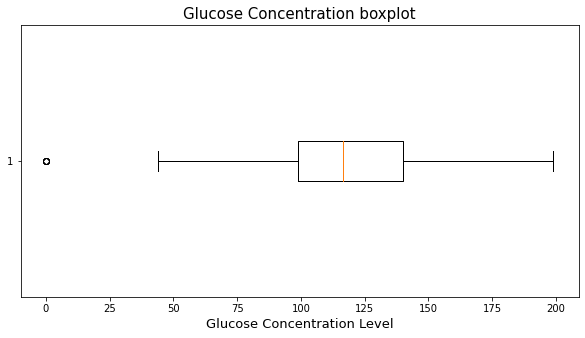

In [52]:
# Finding out lower and upper class bound for patient pregnancy.

glucose_concentration_lower_bound = data.glucose_concentration.quantile(0.25)
glucose_concentration_upper_bound = data.glucose_concentration.quantile(0.75)
print(f"Glucose Concentration lower bound score is: {glucose_concentration_lower_bound}\nGlucose Concentration upper bound score is: {glucose_concentration_upper_bound}")

plt.figure(figsize= (10,5))
plt.boxplot(data.glucose_concentration, vert=False)
plt.title("Glucose Concentration boxplot", fontsize= 15)
plt.xlabel("Glucose Concentration Level", fontsize= 13)
plt.show()

## Things to note about Glucose concentratio level:
- The lower class bound of the dataset is **99.0** however, 99 is an ideal level therefore, only those below 80 will be dropped.

In [53]:
# Getting all glucose_concentration levels less than c
glucose_outliers = data[data.glucose_concentration <= 80]
display(glucose_outliers)

# Glucose concentration levels less than 70 are generally concidered too low therefore, they will be dropped.
data = data[data.glucose_concentration > 80]

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
12,2,71,70,27,0,28.0,0.586,22,0
13,9,57,80,37,0,32.8,0.096,41,0
27,0,67,76,0,0,45.3,0.194,46,0
58,2,68,62,13,15,20.1,0.257,23,0
73,3,80,0,0,0,0.0,0.174,22,0
110,1,0,68,35,0,32.0,0.389,22,0
114,3,78,70,0,0,32.5,0.270,39,0
117,1,79,60,42,48,43.5,0.678,23,0
122,4,76,62,0,0,34.0,0.391,25,0
145,10,75,82,0,0,33.3,0.263,38,0


The blood pressure lower bound is: 64.0
The blood pressure upper bound is 80.0


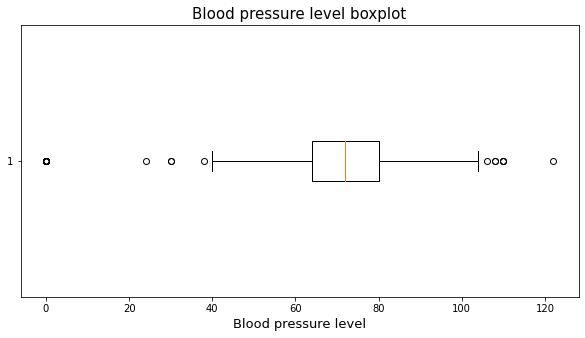

In [54]:
blood_pressure_lower_bound = data.blood_pressure.quantile(0.25)
blood_pressure_upper_bound = data.blood_pressure.quantile(0.75)
print(f"The blood pressure lower bound is: {blood_pressure_lower_bound}\nThe blood pressure upper bound is {blood_pressure_upper_bound}")

plt.figure(figsize= (10,5))
plt.boxplot(data.blood_pressure, vert= False)
plt.title("Blood pressure level boxplot", fontsize= 15)
plt.xlabel("Blood pressure level", fontsize= 13)
plt.show()

## Things to note about Bood pressure level:
- The lower class bound of the dataset is **64.0** which is close the the minimum possible blood pressure a human can have and still be alive (According to google: All American Hospice)
- The upper class bound of the dataset is **80.0** which is still a fair range
- All bp below lower class bound will be dropped because they are too low to be real.

In [55]:
data = data[data.blood_pressure > blood_pressure_lower_bound]
data.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1
5,4,114,65,0,0,21.9,0.432,37,0
7,2,100,70,52,57,40.5,0.677,25,0


The skin fold thickness lower bound is: 0.0
The skin fold thickness upper bound is 33.0
The average skin fold thickness is 24.0


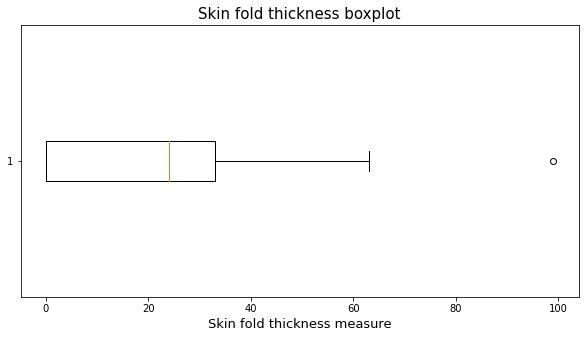

In [56]:
skin_fold_thickness_lower_bound = data.skin_fold_thickness.quantile(0.25)
skin_fold_thickness_upper_bound = data.skin_fold_thickness.quantile(0.75)
skin_fold_thickness_average = data.skin_fold_thickness.quantile(0.5)
print(f"The skin fold thickness lower bound is: {skin_fold_thickness_lower_bound}\nThe skin fold thickness upper bound is {skin_fold_thickness_upper_bound}")
print(f"The average skin fold thickness is {skin_fold_thickness_average}")

plt.figure(figsize= (10,5))
plt.boxplot(data.skin_fold_thickness, vert= False)
plt.title("Skin fold thickness boxplot", fontsize= 15)
plt.xlabel("Skin fold thickness measure", fontsize= 13)
plt.show()

## Things to note about skin fold thickness level:
- The lower class bound of the dataset is **0** which is impossible therefore, any skin fold thickness equal to 0 will be dropped.
- The upper class bound of the dataset is **33.0**  therefore, any skin fold thickness above that will be dropped.

In [57]:
data = data[(data.skin_fold_thickness != skin_fold_thickness_lower_bound) & (data.skin_fold_thickness <= skin_fold_thickness_upper_bound)]

The Serum Insulin level bound is: 0.0
The Serum Insulin level upper bound is 145.75
The average Serum Insulin level is 26.0


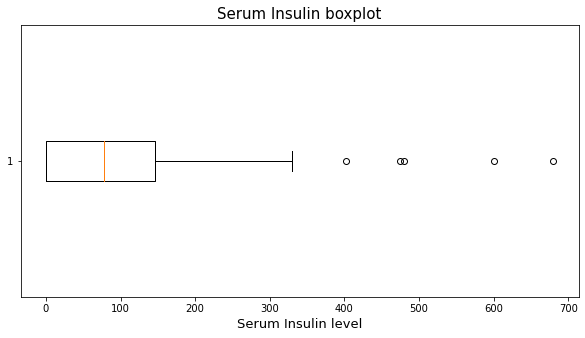

In [58]:
serum_insulin_lower_bound = data.serum_insulin.quantile(0.25)
serum_insulin_upper_bound = data.serum_insulin.quantile(0.75)
serum_insulin_average = data.skin_fold_thickness.quantile(0.5)
print(f"The Serum Insulin level bound is: {serum_insulin_lower_bound}\nThe Serum Insulin level upper bound is {serum_insulin_upper_bound}")
print(f"The average Serum Insulin level is {serum_insulin_average}")

plt.figure(figsize= (10,5))
plt.boxplot(data.serum_insulin, vert= False)
plt.title("Serum Insulin boxplot", fontsize= 15)
plt.xlabel("Serum Insulin level", fontsize= 13)
plt.show()

## Things to note about Serum Insulin level:
- The lower class bound of the dataset is **0** which is impossible therefore, any Serum Insulin level equal to 0 will be dropped.
- The upper class bound of the dataset is **145.75**  however, according to google insulin levels can rise to about **210** therefore, any Serum Insulin level above that will be dropped.

In [59]:
data = data[(data.serum_insulin != serum_insulin_lower_bound) & (data.serum_insulin <= 210)]

The BMI lower bound is: 26.2
The BMI upper bound is 34.3
The average BMI is 30.8


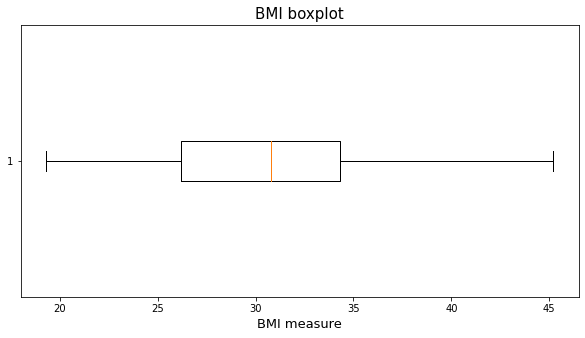

In [60]:
bmi_lower_bound = data.bmi.quantile(0.25)
bmi_upper_bound = data.bmi.quantile(0.75)
bmi_average = data.bmi.quantile(0.5)
print(f"The BMI lower bound is: {bmi_lower_bound}\nThe BMI upper bound is {bmi_upper_bound}")
print(f"The average BMI is {bmi_average}")

plt.figure(figsize= (10,5))
plt.boxplot(data.bmi, vert= False)
plt.title("BMI boxplot", fontsize= 15)
plt.xlabel("BMI measure", fontsize= 13)
plt.show()

## Things to note about BMI:
- The lower class bound of the dataset is **26.2** but BMI levels can go as low as 19 therefore, none lower than the lower class bound will be dropped.
- The upper class bound of the dataset is **34.3**  which is still a valid range. The maximum BMI is **45.2** which is still a valid range therefore, no BMI data will be dropped.

## Extra info
- Most independent variables have been analized and outlier have been eliminated. Time for the next stage of analusis to begin.

In [61]:
data.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,3.054264,120.837209,74.604651,23.162791,113.527132,30.821705,0.459961,31.108527,0.286822
std,2.616982,28.571673,6.937690,6.464797,50.063097,5.612806,0.257260,10.137523,0.454041
min,0.000000,81.000000,65.000000,11.000000,18.000000,19.300000,0.089000,21.000000,0.000000
25%,1.000000,99.000000,70.000000,18.000000,71.000000,26.200000,0.262000,24.000000,0.000000
50%,2.000000,117.000000,74.000000,24.000000,106.000000,30.800000,0.433000,27.000000,0.000000
75%,4.000000,134.000000,78.000000,29.000000,155.000000,34.300000,0.597000,36.000000,1.000000
max,10.000000,195.000000,102.000000,33.000000,210.000000,45.200000,1.391000,81.000000,1.000000


In [65]:
data.reset_index(inplace=True)

data.drop("level_0", axis=1, inplace= True)
data.drop("index", axis=1, inplace= True)
data.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,3,128,72,25,190,32.4,0.549,27,1
2,0,94,70,27,115,43.5,0.347,21,0
3,1,81,72,18,40,26.6,0.283,24,0
4,1,157,72,21,168,25.6,0.123,24,0


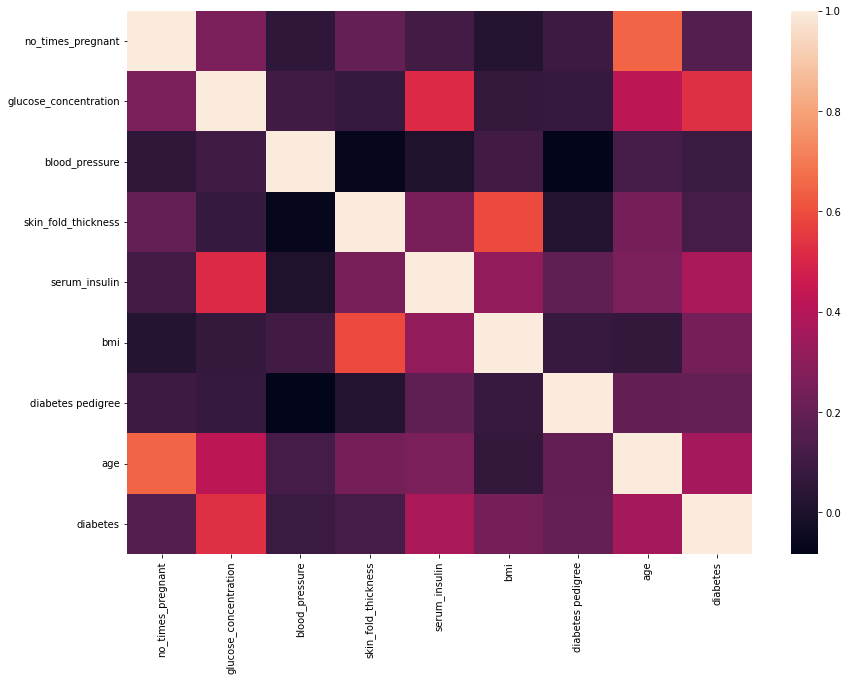

In [ ]:
new_correlation = data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(new_correlation)
plt.show()

In [ ]:
data.diabetes.value_counts()

0    92
1    37
Name: diabetes, dtype: int64

> Due to the imbalance in the data, the SMOTE (Synthetic Minority Over-sampling Technique) will be used to oversample the minority class after data analysis

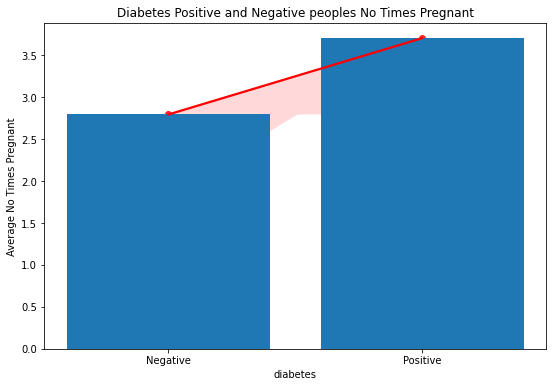

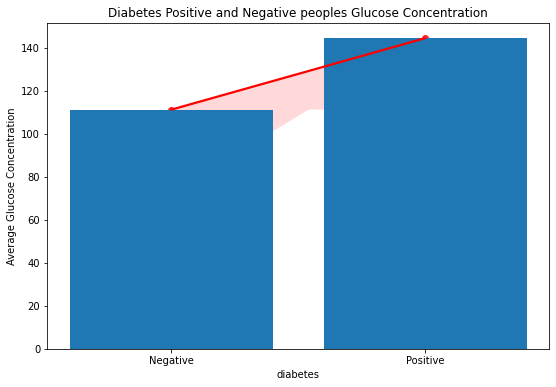

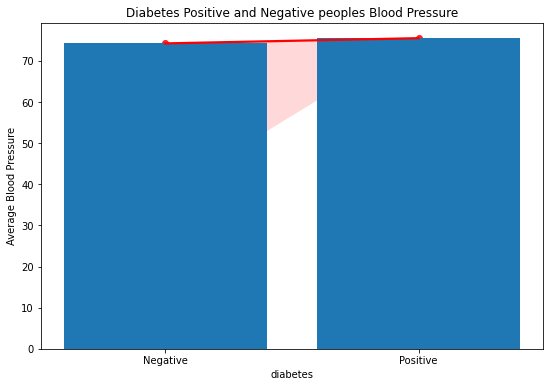

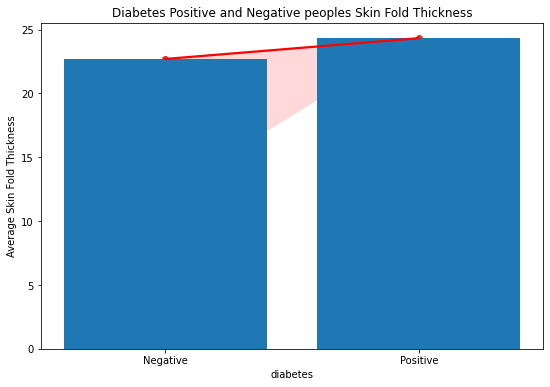

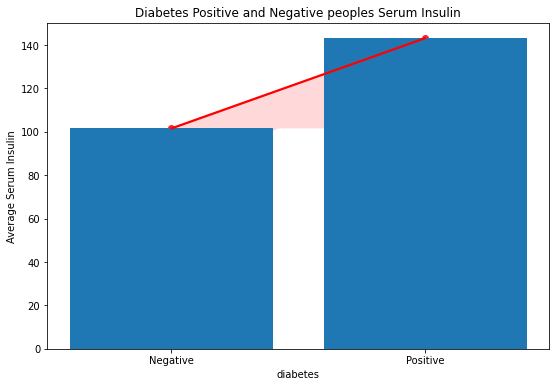

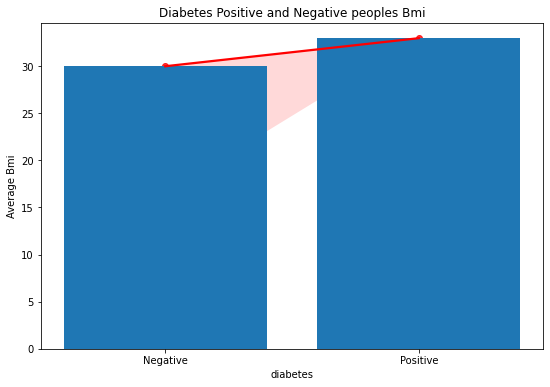

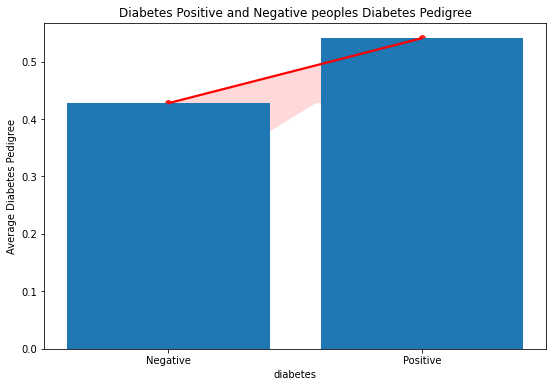

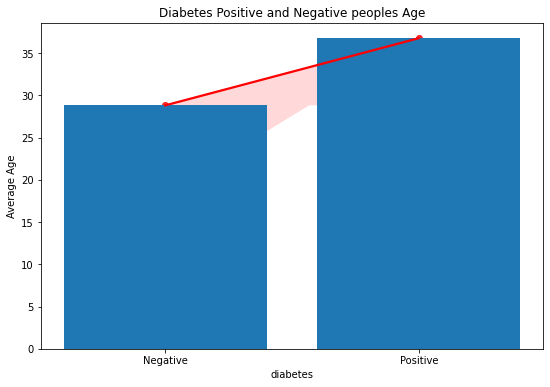

In [66]:
# List containing all columns but the diabetes status.
columns = data.columns[:-1]

for column in columns:
    plt.figure(figsize= (9,6))
    grouping = data.groupby("diabetes")[column].mean()
    sns.regplot(x= grouping.index, y= grouping.values, color="red")
    plt.bar(["Negative", "Positive"], grouping.values)
    plt.title(f"Diabetes Positive and Negative peoples {column.replace('_', ' ').title()}")
    plt.ylabel(f"Average {column.replace('_', ' ').title()}")
plt.show()

## General observations on the data

- Number of births correlate positively with diatetes status i.e More births equal higher chances of having diabetes.
- Glucose concentration correlates positively with diabetes status. The higher the individuals glucose concentration level, the more likely they are to have diabetes.
- Blood pressure doesn't seem to corrlate strongly with diabates status but this may be due to low data sample size. There is a tendency that diabetes status will be positive with increasing blood pressure based on the regression plot.
- Skin Fold Thickness doesn't seem to corelate strongly with diabetes either. This may aslso be due to low data sample size however, with increasing skin fold thickness, there are higher chances of having diabetes based on the linear regression plot.
- Serum Insulin levels correlate positively with diabetes status. The higher the individuals serum insulin level, the more likely they are to have diabetes.
- BMI levels correlate positively with diabetes status. The higher the BMI, the more likely an individual is to have diabetes
- Diabetes pedigree correlates positvely with diabetes status. An individual with a high diabetes pedigree is most likely to be diabetes positive.
- Age correlates positively with diabetes status. The older a person is, the more likely they are to be diabetes positive.

In [127]:
# Splitting data into dependent and independent set (Training data)

x_set = data.drop("diabetes", axis=1)
y_set = data["diabetes"]

In [128]:
over_sampler = SMOTE(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_set, y_set)

In [135]:
# Model Training
model = DecisionTreeClassifier()
model = model.fit(x_set, y_set)

In [154]:
# Read in test data
test = pd.read_csv("test.csv")

y_test = test["diabetes"]
x_test = test.drop(["diabetes", "p_id"], axis=1)

In [156]:
# Model evaluation
predictions = model.predict(x_test)
score = r2_score(y_test, predictions)
print(f"The model has an accuracy score of {score.round(2)*100}%")

The model has an accuracy score of 82.0%


In [159]:
import pickle

pickle.dump(model, open("final_model.pkl", "wb"))